# First steps using mokapot in Python

In this vignette, we'll look at the basics of how to use mokapot as a Python package. We've performed these analyses within a [Jupyter notebook](https://jupyter.org/), which is available using the link at the top of the page.

## Following along locally

To run this notebook, you'll need to have [mokapot](https://mokapot.readthedocs.io/en/latest/#installation) installed. Additionally, you'll need to have a file in the [Percolator tab-delimited format](https://github.com/percolator/percolator/wiki/Interface#tab-delimited-file-format) on hand. The example we'll be using comes from running [tide-search](http://crux.ms/tide-search) on a single phosphoproteomics experiment from: 

> Hogrebe, Alexander et al. “Benchmarking common quantification strategies for large-scale phosphoproteomics.” Nature communications vol. 9,1 1045. 13 Mar. 2018, doi:10.1038/s41467-018-03309-6

If you need it, you can download it from the mokapot repository here ([phospho_rep1.pin](https://raw.githubusercontent.com/wfondrie/mokapot/master/data/phospho_rep1.pin)) and set the path to your input file:

In [1]:
pin_file = "../../../data/phospho_rep1.pin"

Additionally, we'll need the FASTA file used for the database search to perform protein-level confidence estimates. Critically, this file must include both target and decoy protein sequences. The correct FASTA file for the above example can also be downloaded from the mokapot repository ([human_sp_td.fasta](https://raw.githubusercontent.com/wfondrie/mokapot/master/data/human_sp_td.fasta)). Once downloaded, you can define the path to your FASTA file to follow along:

In [2]:
fasta_file = "../../../data/human_sp_td.fasta"

## Step 1: Setup our Python environment

Before we can perform an anlyses we need to import the Python packages that we'll be using. Additionally, it's a good idea to set the random seed for reproducibility.

In [3]:
import os
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed:
np.random.seed(42)

# Create an output directory
out_dir = "basic_python_api_output"
os.makedirs(out_dir, exist_ok=True)

If we want messages about the mokapot's progress throughout the analysis, then we need to enable it using the `logging` module: 

In [4]:
import logging

# Change to True enable messages and nicely format them:
log = False
if log:
    logging.basicConfig(format=("[{levelname}] {message}"), 
                        style="{", level=logging.INFO)

## Step 2: Read the PSMs

We'll now use mokapot to read the PSMs from the provided input file. The [read_pin()](https://mokapot.readthedocs.io/en/latest/api/functions.html#mokapot.read_pin) function returns [LinearPsmDataset](https://mokapot.readthedocs.io/en/latest/api/dataset.html#mokapot.dataset.LinearPsmDataset) object, which stores the PSMs and their associated features for analysis.

In [5]:
psms = mokapot.read_pin(pin_file)

### Optional: Add proteins
mokapot uses the [picked-protein approach](https://www.mcponline.org/content/14/9/2394.long) to assign accurate protein-level confidence estimates. To do this, you'll need to provide the FASTA file used for your database search (including decoy sequences) and supply the parameters that match the digestion conditions you searched.

In [6]:
psms.add_proteins(fasta_file)

## Step 3: Analyze the PSMs

After that the PSMs have been loaded, we can use the [brew()](https://mokapot.readthedocs.io/en/latest/api/functions.html#mokapot.brew) function to run the analysis and re-score the PSMs. This returns a [LinearConfidence](https://mokapot.readthedocs.io/en/latest/api/confidence.html#mokapot.confidence.LinearConfidence) object, which calculates confidences estimates and stores them.

In [7]:
moka_conf, models = mokapot.brew(psms)
moka_conf.psms.head()

,SpecId,Label,ScanNr,ExpMass,CalcMass,Peptide,Proteins,mokapot score,mokapot q-value,mokapot PEP
0,target_0_48845_5_-1,True,48845,5269.5756,5269.5728,R.RGNVAGDSKNDPPMEAAGFTAQVIILNHPGQISAGYAPVLDCHT...,sp|P68104|EF1A1_HUMAN,11.215498,0.000053,6.305117e-16
1,target_0_45243_4_-1,True,45243,3945.8759,3945.8706,R.CSDAAGYPHATHDLEGPPLDAYSIQGQHTISPLDLAK.L,sp|Q15365|PCBP1_HUMAN,10.601063,0.000053,6.305117e-16
2,target_0_51371_4_-1,True,51371,4051.1223,4051.1086,K.KLHEEEIQELQAQIQEQHVQIDVDVSKPDLTAALR.D,sp|P08670|VIME_HUMAN,10.550855,0.000053,6.305117e-16
3,target_0_41715_3_-1,True,41715,4473.8359,4473.8286,K.ALGKYGPADVEDTTGSGATDSKDDDDIDLFGS[79.97]DDEEE...,sp|P24534|EF1B_HUMAN,9.964699,0.000053,6.305117e-16
4,target_0_48913_5_-1,True,48913,5269.5737,5269.5728,R.RGNVAGDSKNDPPMEAAGFTAQVIILNHPGQISAGYAPVLDCHT...,sp|P68104|EF1A1_HUMAN,9.874374,0.000053,6.305117e-16


In [8]:
moka_conf.peptides.head()

,SpecId,Label,ScanNr,ExpMass,CalcMass,Peptide,Proteins,mokapot score,mokapot q-value,mokapot PEP
0,target_0_48845_5_-1,True,48845,5269.5756,5269.5728,R.RGNVAGDSKNDPPMEAAGFTAQVIILNHPGQISAGYAPVLDCHT...,sp|P68104|EF1A1_HUMAN,11.215498,0.000073,6.305117e-16
1,target_0_45243_4_-1,True,45243,3945.8759,3945.8706,R.CSDAAGYPHATHDLEGPPLDAYSIQGQHTISPLDLAK.L,sp|Q15365|PCBP1_HUMAN,10.601063,0.000073,6.305117e-16
2,target_0_51371_4_-1,True,51371,4051.1223,4051.1086,K.KLHEEEIQELQAQIQEQHVQIDVDVSKPDLTAALR.D,sp|P08670|VIME_HUMAN,10.550855,0.000073,6.305117e-16
3,target_0_41715_3_-1,True,41715,4473.8359,4473.8286,K.ALGKYGPADVEDTTGSGATDSKDDDDIDLFGS[79.97]DDEEE...,sp|P24534|EF1B_HUMAN,9.964699,0.000073,6.305117e-16
4,target_0_31886_3_-1,True,31886,3450.7612,3450.7544,R.AAAAVAAAASSCRPLGSGAGPGPTGAAPVSAPAPGPGPAGK.G,sp|Q9NRL3|STRN4_HUMAN,9.778672,0.000073,6.305117e-16


In [9]:
moka_conf.proteins.head()

,mokapot protein group,best peptide,stripped sequence,mokapot score,mokapot q-value,mokapot PEP
0,sp|P68104|EF1A1_HUMAN,R.RGNVAGDSKNDPPMEAAGFTAQVIILNHPGQISAGYAPVLDCHT...,RGNVAGDSKNDPPMEAAGFTAQVIILNHPGQISAGYAPVLDCHTAH...,11.215498,0.000292,6.305117e-16
1,sp|Q15365|PCBP1_HUMAN,R.CSDAAGYPHATHDLEGPPLDAYSIQGQHTISPLDLAK.L,CSDAAGYPHATHDLEGPPLDAYSIQGQHTISPLDLAK,10.601063,0.000292,6.305117e-16
2,sp|P08670|VIME_HUMAN,K.KLHEEEIQELQAQIQEQHVQIDVDVSKPDLTAALR.D,KLHEEEIQELQAQIQEQHVQIDVDVSKPDLTAALR,10.550855,0.000292,6.305117e-16
3,sp|P24534|EF1B_HUMAN,K.ALGKYGPADVEDTTGSGATDSKDDDDIDLFGS[79.97]DDEEE...,ALGKYGPADVEDTTGSGATDSKDDDDIDLFGSDDEEESEEAK,9.964699,0.000292,6.305117e-16
4,sp|Q9NRL3|STRN4_HUMAN,R.AAAAVAAAASSCRPLGSGAGPGPTGAAPVSAPAPGPGPAGK.G,AAAAVAAAASSCRPLGSGAGPGPTGAAPVSAPAPGPGPAGK,9.778672,0.000292,6.305117e-16


We can also use mokapot assign confidence estimates based on the best original feature---the Tide combined p-value in this case---instead of using the learned scores:

In [10]:
tide_conf = psms.assign_confidence()

## Step 4: Plot and save the results

We've included some simple plotting utilities to help assess mokapot's perfomance. Let's see if the mokapot model improves upon the best feature, which is Tide's combined p-value: 

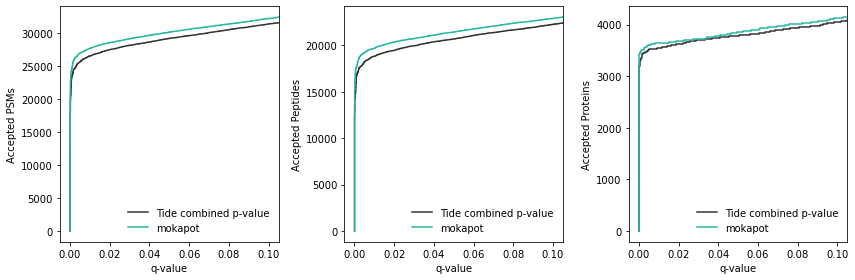

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
colors = ("#343131", "#24B8A0")

# Plot the performance:
for ax, level in zip(axs, tide_conf.levels):
    tide_conf.plot_qvalues(level=level, c=colors[0], ax=ax,
                           label="Tide combined p-value")
    moka_conf.plot_qvalues(level=level, c=colors[1], ax=ax,
                           label="mokapot")
    ax.legend(frameon=False)

plt.tight_layout()
plt.show()

Excellent. It looks like mokapot increased our power to detect a few hundred more PSMs and peptides at 1% FDR. We figure out the exact improvement by looking at the data:

In [12]:
# PSMs
moka_psms = (moka_conf.psms["mokapot q-value"] <= 0.01).sum()
tide_psms = (tide_conf.psms["mokapot q-value"] <= 0.01).sum()
print(f"PSMs gained by mokapot: {moka_psms - tide_psms}")

# Peptides
moka_peps = (moka_conf.peptides["mokapot q-value"] <= 0.01).sum()
tide_peps = (tide_conf.peptides["mokapot q-value"] <= 0.01).sum()
print(f"Peptides gained by mokapot: {moka_peps - tide_peps}")

# Proteins
moka_prots = (moka_conf.proteins["mokapot q-value"] <= 0.01).sum()
tide_prots = (tide_conf.proteins["mokapot q-value"] <= 0.01).sum()
print(f"Proteins gained by mokapot: {moka_prots - tide_prots}")

PSMs gained by mokapot: 1149
Peptides gained by mokapot: 872
Proteins gained by mokapot: 89


Finally, we will save the results as tab-delimited text files:

In [13]:
result_files = moka_conf.to_txt(dest_dir=out_dir)
result_files

['basic_python_api_output/mokapot.psms.txt',
 'basic_python_api_output/mokapot.peptides.txt',
 'basic_python_api_output/mokapot.proteins.txt']

## Wrapping up

This vignette demonstrated the basic usage of mokapot's Python API. For more detail about any of the mokapot functions and classes that we used, see the [mokapot Python API documentation](https://mokapot.readthedocs.io/en/latest/api/index.html). Finally, check out the other vignettes for examples of advanced usage of mokapot's Python API.